## Setup kaggle API and Download datasets

In [1]:
!pip install -q kaggle

In [2]:
import json

kaggle_token = {"username":"alimustoofaa","key":"2813bea47db4baf7c78d2563796b9f12"}

with open('kaggle.json', "w") as outfile:
    json.dump(kaggle_token, outfile)

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d rkb0023/houserentpredictiondataset
!unzip houserentpredictiondataset.zip

 89% 65.0M/72.9M [00:00<00:00, 131MB/s]
100% 72.9M/72.9M [00:00<00:00, 131MB/s]
Archive:  houserentpredictiondataset.zip
  inflating: houseRent/housePricing.docx  
  inflating: houseRent/housing_train.csv  


##Data Understanding & Removing Outlier


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('/content/houseRent/housing_train.csv')
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


##Data Understanding & Removing Outlier


In [7]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [8]:
df.shape

(265190, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [10]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


# Formating Data

In [11]:
# Column id url region_url image_url description lat long
df  = df.drop(['id','url','region_url','image_url','description','lat','long'], axis = 'columns')
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,al


In [12]:
# Merubah nilai baths menjadi int
df['baths'] = np.ceil(df['baths'])
df['baths'] = df['baths'].astype(np.int)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,birmingham,1195,apartment,1908,3,2,1,1,1,0,0,0,laundry on site,street parking,al
1,birmingham,1120,apartment,1319,3,2,1,1,1,0,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,2,1,1,1,0,0,0,laundry on site,street parking,al
3,birmingham,800,apartment,927,1,1,1,1,1,0,0,0,laundry on site,street parking,al
4,birmingham,785,apartment,1047,2,1,1,1,1,0,0,0,laundry on site,street parking,al


## Univariate Analysis


In [13]:
df.groupby('type')['type'].agg('count')

type
apartment          218032
assisted living         1
condo                4864
cottage/cabin         702
duplex               3452
flat                  349
house               23741
in-law                145
land                    4
loft                  511
manufactured         3008
townhouse           10381
Name: type, dtype: int64

In [14]:
# Column type terdapat 1 sample assisted living dan 4 sample land sehingga sample tersebut akan dihapus
df.drop(df.index[df['type'] == 'assisted living'], inplace = True)
df.drop(df.index[df['type'] == 'land'], inplace = True)

df.groupby('type')['type'].agg('count')

type
apartment        218032
condo              4864
cottage/cabin       702
duplex             3452
flat                349
house             23741
in-law              145
loft                511
manufactured       3008
townhouse         10381
Name: type, dtype: int64

In [15]:
df.groupby('laundry_options')['laundry_options'].agg('count')

laundry_options
laundry in bldg       27816
laundry on site       39183
no laundry on site     2551
w/d hookups           50251
w/d in unit           91073
Name: laundry_options, dtype: int64

In [16]:
df.groupby('parking_options')['parking_options'].agg('count')

parking_options
attached garage       27591
carport               28685
detached garage       12798
no parking             1973
off-street parking    88311
street parking        10570
valet parking           122
Name: parking_options, dtype: int64

In [17]:
df.groupby('region')['region'].agg('count')

region
SF bay area               2327
akron / canton            1532
albany                    2090
albuquerque               2144
ames                       360
                          ... 
winston-salem             2123
worcester / central MA    1452
yuba-sutter                152
yuma                       215
zanesville / cambridge       3
Name: region, Length: 298, dtype: int64

In [18]:
# Column region terlalu banyak memiliki kategori, maka column tersebut akan dihapus
df  = df.drop(['region'], axis = 'columns')
df.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,1195,apartment,1908,3,2,1,1,1,0,0,0,laundry on site,street parking,al
1,1120,apartment,1319,3,2,1,1,1,0,0,0,laundry on site,off-street parking,al
2,825,apartment,1133,1,2,1,1,1,0,0,0,laundry on site,street parking,al
3,800,apartment,927,1,1,1,1,1,0,0,0,laundry on site,street parking,al
4,785,apartment,1047,2,1,1,1,1,0,0,0,laundry on site,street parking,al


In [19]:
df.groupby('state')['state'].agg('count')

state
ak     2169
al     6198
ar     3148
az     6752
ca    33085
co    11308
ct     3765
dc     2502
de     2048
fl    31926
ga    13841
hi     1840
ia     7488
id     4466
il     9706
in     6416
ks     7910
ky     5419
la     7304
ma     4926
md     7451
me      420
mi    14529
mn     7468
mo     2158
ms     4973
mt     1339
nc    18628
nd     3428
ne     2697
nh     1761
nj     5711
nm     2916
nv     2846
ny     9991
oh     6558
ok       49
or       44
Name: state, dtype: int64

In [20]:
# Column region terdapat 49 ok dan 44 or yang terlalu sedikit, maka sample tersebut akan dihapus
df.drop(df.index[df['state'] == '49'], inplace = True)
df.drop(df.index[df['state'] == '44'], inplace = True)

df.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,1195,apartment,1908,3,2,1,1,1,0,0,0,laundry on site,street parking,al
1,1120,apartment,1319,3,2,1,1,1,0,0,0,laundry on site,off-street parking,al
2,825,apartment,1133,1,2,1,1,1,0,0,0,laundry on site,street parking,al
3,800,apartment,927,1,1,1,1,1,0,0,0,laundry on site,street parking,al
4,785,apartment,1047,2,1,1,1,1,0,0,0,laundry on site,street parking,al


In [21]:
df.groupby('wheelchair_access')['wheelchair_access'].agg('count')

wheelchair_access
0    244299
1     20886
Name: wheelchair_access, dtype: int64

In [22]:
df.groupby('electric_vehicle_charge')['electric_vehicle_charge'].agg('count')

electric_vehicle_charge
0    261378
1      3807
Name: electric_vehicle_charge, dtype: int64

In [23]:
df.groupby('comes_furnished')['comes_furnished'].agg('count')

comes_furnished
0    252285
1     12900
Name: comes_furnished, dtype: int64

In [24]:
df.groupby('cats_allowed')['cats_allowed'].agg('count')

cats_allowed
0     75094
1    190091
Name: cats_allowed, dtype: int64

In [25]:
df.groupby('dogs_allowed')['dogs_allowed'].agg('count')

dogs_allowed
0     80470
1    184715
Name: dogs_allowed, dtype: int64

In [26]:
df.groupby('sqfeet')['sqfeet'].agg('count')

sqfeet
0          42
1          42
2          26
5           4
6           1
           ..
775814      1
999999      4
1019856     2
8000000     1
8388607     1
Name: sqfeet, Length: 3037, dtype: int64

In [27]:
df = df.loc[(df[['sqfeet']]!=0).all(axis=1)]
df.shape

(265143, 14)

In [28]:
df.groupby('beds')['beds'].agg('count')

beds
0         7526
1        80519
2       120132
3        46957
4         8171
5         1589
6          185
7           40
8           22
1100         2
Name: beds, dtype: int64

In [29]:
beds = (df.beds == 0).sum()
print("Nilai 0 di kolom bed ada: ", beds)

beds = (df.beds > 8).sum()
print("Nilai besar dari 8 di kolom bed ada: ", beds)

Nilai 0 di kolom bed ada:  7526
Nilai besar dari 8 di kolom bed ada:  2


In [30]:
df = df.loc[(df[['beds']]!=0).all(axis=1)]
df.shape

(257617, 14)

In [31]:
df = df.loc[(df[['beds']]<=8).all(axis=1)]
df.shape

(257615, 14)

In [32]:
df.groupby('baths')['baths'].agg('count')

baths
0      2045
1    128930
2    112133
3     12421
4      1782
5       249
6        44
7         8
8         2
9         1
Name: baths, dtype: int64

In [33]:
beds = (df.baths == 0).sum()
print("Nilai 0 di kolom baths ada: ", beds)

beds = (df.baths > 9).sum()
print("Nilai besar dari 9 di kolom baths ada: ", beds)

Nilai 0 di kolom baths ada:  2045
Nilai besar dari 9 di kolom baths ada:  0


In [34]:
df = df.loc[(df[['baths']]!=0).all(axis=1)]
df.shape

(255570, 14)

In [35]:
df = df.loc[(df[['baths']]<=9).all(axis=1)]
df.shape

(255570, 14)

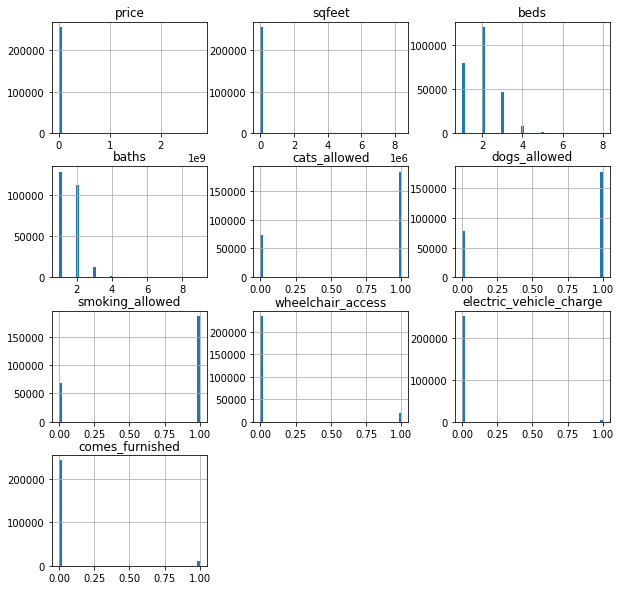

In [36]:
df.hist(bins=50, figsize=(10,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [37]:
df.price.describe().apply(lambda x: format(x, 'f'))

count        255570.000000
mean          12656.828313
std         5476574.592850
min               0.000000
25%             825.000000
50%            1070.000000
75%            1450.000000
max      2768307249.000000
Name: price, dtype: object

In [38]:
# Menghapus price per sqft outlier dengan mean dan one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('type'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(254610, 14)

In [39]:
df.sqfeet.describe().apply(lambda x: format(x, 'f'))

count     254610.000000
mean        1111.379015
std        23542.903470
min            1.000000
25%          771.250000
50%          960.000000
75%         1162.000000
max      8388607.000000
Name: sqfeet, dtype: object

In [40]:
# Menghapus price per sqft outlier dengan mean dan one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('type'):
        m = np.mean(subdf.sqfeet)
        st = np.std(subdf.sqfeet)
        reduced_df = subdf[(subdf.sqfeet>(m-st)) & (subdf.sqfeet<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(253979, 14)

## Multivariate Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253979 entries, 0 to 253978
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   price                    253979 non-null  int64 
 1   type                     253979 non-null  object
 2   sqfeet                   253979 non-null  int64 
 3   beds                     253979 non-null  int64 
 4   baths                    253979 non-null  int64 
 5   cats_allowed             253979 non-null  int64 
 6   dogs_allowed             253979 non-null  int64 
 7   smoking_allowed          253979 non-null  int64 
 8   wheelchair_access        253979 non-null  int64 
 9   electric_vehicle_charge  253979 non-null  int64 
 10  comes_furnished          253979 non-null  int64 
 11  laundry_options          201921 non-null  object
 12  parking_options          162573 non-null  object
 13  state                    253978 non-null  object
dtypes: int64(10), object

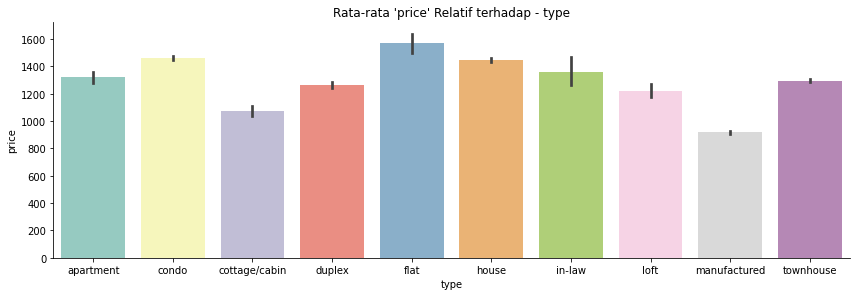

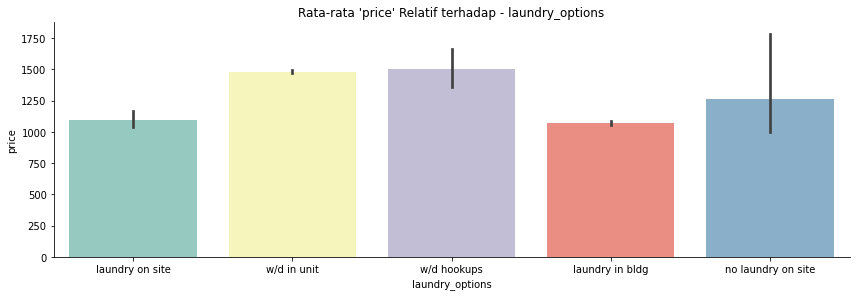

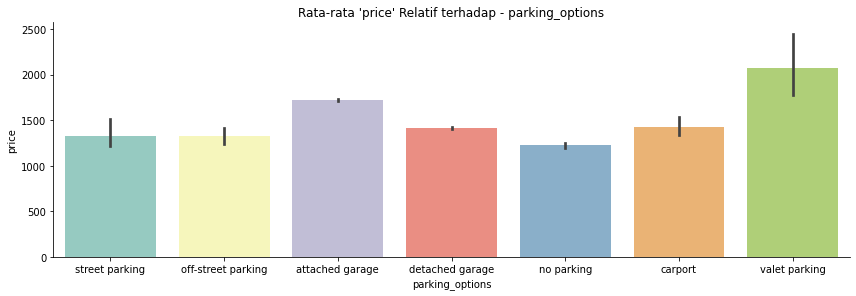

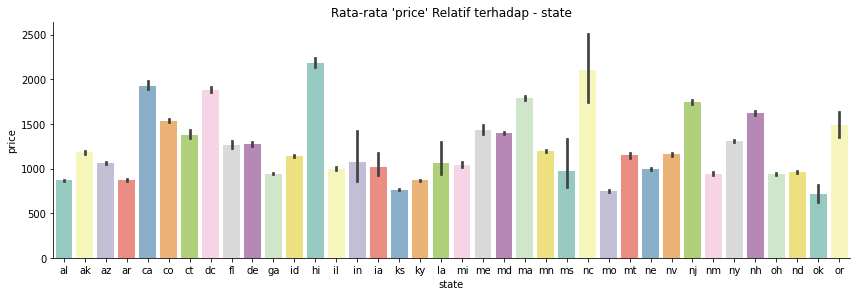

In [42]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

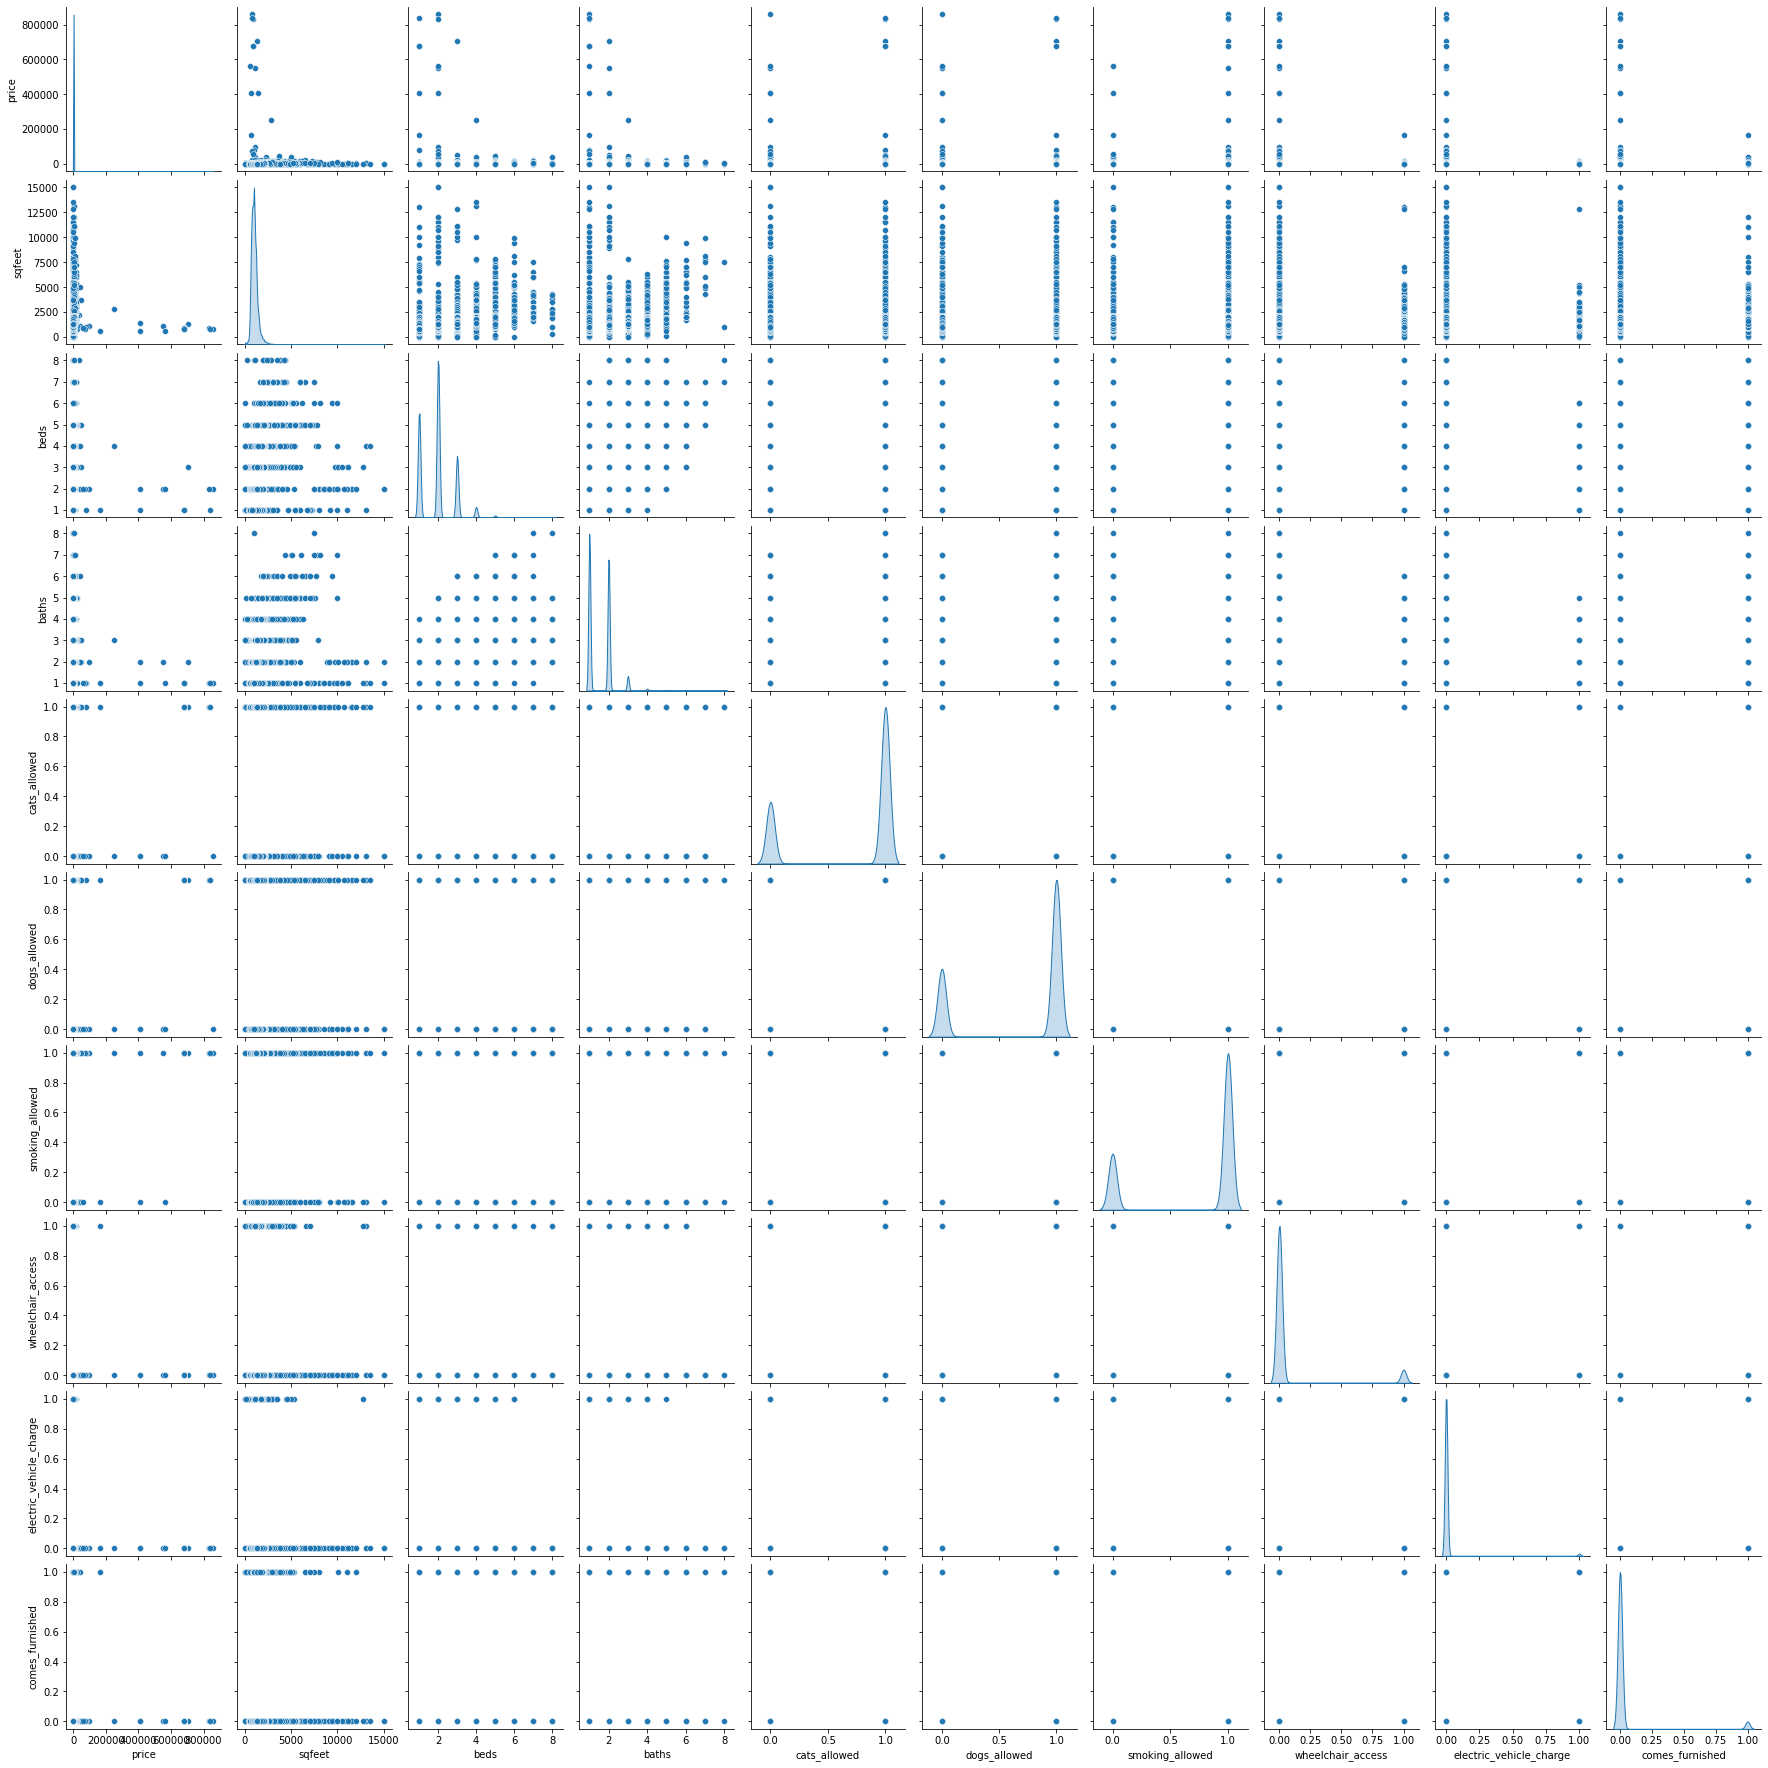

In [43]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

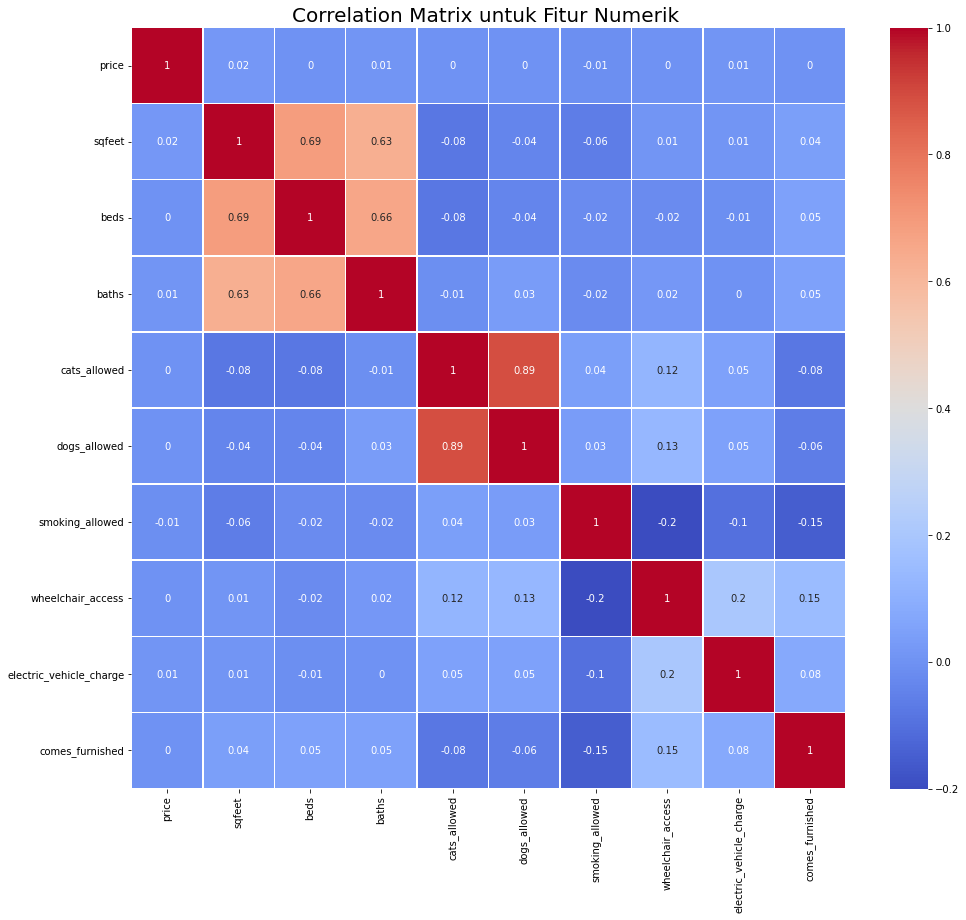

In [44]:
plt.figure(figsize=(16, 14))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


In [45]:
# Dari data metrik diatas, terdapat column yang tidak berkorelasi, sehingga dihapus
df_new = df.drop(['comes_furnished', 'electric_vehicle_charge', 'wheelchair_access', 'smoking_allowed'], axis = 'columns')
df_new.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,laundry_options,parking_options,state
0,1195,apartment,1908,3,2,1,1,laundry on site,street parking,al
1,1120,apartment,1319,3,2,1,1,laundry on site,off-street parking,al
2,825,apartment,1133,1,2,1,1,laundry on site,street parking,al
3,800,apartment,927,1,1,1,1,laundry on site,street parking,al
4,785,apartment,1047,2,1,1,1,laundry on site,street parking,al


## Data Preparation


In [46]:
df_new.head()

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,laundry_options,parking_options,state
0,1195,apartment,1908,3,2,1,1,laundry on site,street parking,al
1,1120,apartment,1319,3,2,1,1,laundry on site,off-street parking,al
2,825,apartment,1133,1,2,1,1,laundry on site,street parking,al
3,800,apartment,927,1,1,1,1,laundry on site,street parking,al
4,785,apartment,1047,2,1,1,1,laundry on site,street parking,al


In [47]:
 # One hot encoding
df_new = pd.get_dummies(data = df_new, columns = ['type'])
df_new = pd.get_dummies(data = df_new, columns = ['state'])
df_new = pd.get_dummies(data = df_new, columns = ['laundry_options'])
df_new = pd.get_dummies(data = df_new, columns = ['parking_options'])
df_new.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,type_apartment,type_condo,type_cottage/cabin,type_duplex,...,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking
0,1195,1908,3,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1120,1319,3,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,825,1133,1,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,800,927,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,785,1047,2,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split
 
X = df_new.drop(["price"],axis =1)
y = df_new["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=123)


In [49]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 253979
Total # of sample in train dataset: 241280
Total # of sample in test dataset: 12699


In [50]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data train
numerical_features = ['sqfeet','beds', 'baths']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,sqfeet,beds,baths
61743,0.769856,0.056756,0.706126
216048,0.240823,1.261064,-0.887257
7439,0.345139,1.261064,0.706126
206383,-0.280760,-1.147551,-0.887257
111238,-1.095422,-1.147551,-0.887257


In [51]:
# Normalisasi data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Modeliing

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [53]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [55]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

In [56]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [57]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [58]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
  
# Panggil mse
mse


,train,test
KNN,30750.922947,134069.353599
RF,18464.87181,135898.532381
Boosting,91101.065848,134836.83253


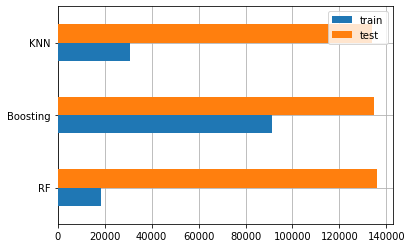

In [59]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


In [60]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)


,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
202465,745,546.5,615.6,1471.8
